In [1]:
number_of_fragment = 2 #(1 or 2)
symmetrize_electron = True
symmetrize_ion = False
write_momentum_to_file = True
manual_offset = False

m1 = 46
m2 = 46
q1 = 1
q2 = 1
# nitrogen 14
# helium 4
# HCOOH 46
#HCOOH dimer

ion1_tof = [5500, 7000]
ion2_tof = [6500, 8250]
ion_xy_edge = [-40, 40]
#Helium -2, 2
#other experiment 40
elec_tof = [38, 72]
#nitrogen N+ N+ 2000-4000, 3000-6000
#HCOOH  HCOOH+ HCOOH+ 5500-7000, 6500-8250
#HCOOH  H+ COOH+ 700-1400, 6250-7000
#HCOOH  OH+ HCO+ 3000 5000 4500 6500
#Helium He+ 1950 2010

#ion xy He -2, 2

#He 40eV
#infile_name = r"G:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\CALBIRATION\He\he_40p59ev_horiz_11p0vcm_9p8g_a_001.root"
#N2
#infile_name = r"G:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\CALBIRATION\N2\1_24\n2_56p0ev_horiz_11p0vcm_9p8g_a.00005_005.root"
#HCOOH dimer
#infile_name = r"D:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240123_HCOOH_dimer\HCOOH_56p0ev_horiz_11p0vcm_9p8g _c.0004s_004.root"
#HCOOD dimer
#infile_name = r"D:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOD\20240206_HCOOD_Dimer\HCOOD_56p0ev_horiz_11p0vcm_9p8g _c.0003s_001.root"
#HCO-OH
#infile_name = r"G:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240126_H2O_CO\HCOOH_56p0ev_horiz_11p0vcm_9p8g _b.0001s_002.root"
#HCO-OH
#infile_name = r"D:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240202_H_HCOO\HCOOH_56p0ev_horiz_11p0vcm_9p8g _a.0000s.root"

infile_name = r"E:\20231112_LBNL_COLTRIMS\202308_ALS_APR_2023_HCOOH Analysis\DATA\HCOOH\20240123_HCOOH_dimer\HCOOH_56p0ev_horiz_11p0vcm_9p8g _c.0002s_002.root"

#he30eV, electron KE 6
#he46eV, electron KE 22
#he52eV, electron KE 28
#manual offset
if manual_offset:
    i_px0_offset = 0
    i_py0_offset = 2
    i_pz0_offset = -6
    i_px1_offset = 0
    i_py1_offset = 7
    i_pz1_offset = -6
else:
    i_px0_offset = 0
    i_py0_offset = 0
    i_pz0_offset = 0
    i_px1_offset = 0
    i_py1_offset = 0
    i_pz1_offset = 0
#HCOOH Dimer 0 2 -6 0 7 -6

In [2]:
######################################
### loading in necessary libraries ###
######################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import ticker
from matplotlib.colors import PowerNorm, LogNorm
from scipy.stats import norm
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
import pandas as pd

from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
from ipywidgets import interactive
# Enable interactive plots
#%matplotlib notebook
#%matplotlib inline

import uproot
import awkward as ak
import os

### Constants

In [3]:
PAU = 1.99285e-24           # Momentum in AU
MASSAU = 1822.888           # Mass in AU
VAU = 2.1877e6              # Velocity in AUs
EVAU = 27.2114              # eV in AU
EFIELDAU = 0.00805          # Electric field (V/cm) in AU
PI = 3.14159265             # PI
MEKG = 9.1093897e-31        # Electron Mass in Kg
MUKG = 1.66053886e-27       # u in Kg
COULOMB = 1.60217733e-19    # Elementary charge
Kg_over_AMU = 1.660538782e-27
C_over_au = 1.602176487e-19

### TOF Paramters

In [4]:
e1tof_left_edge = elec_tof[0]
e1tof_right_edge = elec_tof[1]
r1tof_left_edge = ion1_tof[0]
r1tof_right_edge = ion1_tof[1]

e2tof_left_edge = elec_tof[0]
e2tof_right_edge = elec_tof[1]
r2tof_left_edge = ion2_tof[0]
r2tof_right_edge = ion2_tof[1]

r1x_left_edge = ion_xy_edge[0]
r1x_right_edge= ion_xy_edge[1]
r1y_left_edge = ion_xy_edge[0]
r1y_right_edge= ion_xy_edge[1]

r2x_left_edge = ion_xy_edge[0]
r2x_right_edge= ion_xy_edge[1]
r2y_left_edge = ion_xy_edge[0]
r2y_right_edge= ion_xy_edge[1]

if symmetrize_ion:
    r1tof_left_edge = ion1_tof[0]
    r1tof_right_edge = ion2_tof[1]
    r2tof_left_edge = ion1_tof[0]
    r2tof_right_edge = ion2_tof[1]

B_field_ns = 37.2433
Bfield_clockwise = True

e_acc1mm = 70.0750 #mm 44.0
e_acc2mm = 138.1208 #mm 11.1
e_acc3mm = 5
e_Efield1_Vpcm = 11.0575#/7.00750 #11.2/4.4
e_Efield2_Vpcm = 0 #300/1.11
e_Efield3_Vpcm = 745#/0.5

l_acc1mm = 44 #mm 44.0
l_acc2mm = 11.1 #mm 11.1
l_acc3mm = 0
l_Efield1_Vpcm = 11.1 #11.2/4.4
l_Efield2_Vpcm = 300 #300/1.11
l_Efield3_Vpcm = 0


# Here we first load in the TOF and (x,y) hit positions of electrons and ions. LMF2Root is used to go from raw to (x,y,TOF).

### When we load in the data, we use some list comprehension and 'if' statements to set conditions on the ion TOF and electron TOF to only ions of interest and associated electrons. In the data, columns (0,1,2) are the first electron hit (TOF,x,y). Columns (3,4,5) are the second electron hit. Columns (6,7,8) are the ion hit (TOF,x,y). We are taking 2 electron hits since conditions in 333 were challenging and count rates low.

In [5]:

root_file = uproot.open(infile_name)

l_key_name = root_file.keys()
filtered_variables = [var for var in l_key_name if 'Data' in var]
tree_name = filtered_variables[0]
print(tree_name)

branch = root_file[tree_name]["e1tof"]

e1tof = ak.to_numpy(root_file[tree_name]["e1tof"].array())
e1x = ak.to_numpy(root_file[tree_name]["e1x"].array())
e1y = ak.to_numpy(root_file[tree_name]["e1y"].array())
e2tof = ak.to_numpy(root_file[tree_name]["e2tof"].array())
e2x = ak.to_numpy(root_file[tree_name]["e2x"].array())
e2y = ak.to_numpy(root_file[tree_name]["e2y"].array())
r1tof = ak.to_numpy(root_file[tree_name]["r1tof"].array())
r1x = ak.to_numpy(root_file[tree_name]["r1x"].array())
r1y = ak.to_numpy(root_file[tree_name]["r1y"].array())
r2tof = ak.to_numpy(root_file[tree_name]["r2tof"].array())
r2x = ak.to_numpy(root_file[tree_name]["r2x"].array())
r2y = ak.to_numpy(root_file[tree_name]["r2y"].array())
bunchmarker = ak.to_numpy(root_file[tree_name]["bunchmarker"].array())
totaltof = np.concatenate((r1tof, r2tof), axis = 0)

root_file.close()
print(len(r1tof))
print(len(r2tof))
print(len(totaltof))

Data;2
572020
572020
1144040


In [6]:
# Extracting relevant information from the input file name
folder_path, file_name = os.path.split(infile_name)
file_name_without_extension = os.path.splitext(file_name)[0]

# Create the folder if it doesn't exist
output_folder = os.path.join(folder_path, file_name_without_extension)
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

folder_path = output_folder

In [7]:
if number_of_fragment == 1:
    e2tof = e1tof
    e2x = e1x
    e2y = e1y
    r2tof = r1tof
    r2x = r1x
    r2y = r1y

In [8]:
if symmetrize_electron & (number_of_fragment == 2):
    e_swap_mask_1 = np.random.randint(2, size=len(e1tof))
    e_swap_mask_2 = 1 - e_swap_mask_1 #create array that's the opposite of the top one

    # Assuming e_swap_mask_1, e1tof, and e2tof are your existing arrays
    e1tof_new = np.where(e_swap_mask_1 == 1, e2tof, e1tof)
    e2tof_new = np.where(e_swap_mask_1 == 1, e1tof, e2tof)
    e1x_new = np.where(e_swap_mask_1 == 1, e2x, e1x)
    e2x_new = np.where(e_swap_mask_1 == 1, e1x, e2x)
    e1y_new = np.where(e_swap_mask_1 == 1, e2y, e1y)
    e2y_new = np.where(e_swap_mask_1 == 1, e1y, e2y)

    e1tof_old = e1tof
    e2tof_old = e2tof
    e1x_old = e1x
    e2x_old = e2x
    e1y_old = e1y
    e2y_old = e2y

    e1tof = e1tof_new
    e2tof = e2tof_new
    e1x = e1x_new
    e2x = e2x_new
    e1y = e1y_new
    e2y = e2y_new

# # Now, e1tof_new and e2tof_new contain the swapped values based on the mask e_swap_mask_1


In [9]:
if symmetrize_ion & (number_of_fragment == 2):
    r_swap_mask_1 = np.random.randint(2, size=len(r1tof))
    r_swap_mask_2 = 1 - r_swap_mask_1 #create array that's the opposite of the top one

    # Assuming e_swap_mask_1, e1tof, and e2tof are your existing arrays
    r1tof_new = np.where(r_swap_mask_1 == 1, r2tof, r1tof)
    r2tof_new = np.where(r_swap_mask_1 == 1, r1tof, r2tof)
    r1x_new = np.where(r_swap_mask_1 == 1, r2x, r1x)
    r2x_new = np.where(r_swap_mask_1 == 1, r1x, r2x)
    r1y_new = np.where(r_swap_mask_1 == 1, r2y, r1y)
    r2y_new = np.where(r_swap_mask_1 == 1, r1y, r2y)

    r1tof_old = r1tof
    r2tof_old = r2tof
    r1x_old = r1x
    r2x_old = r2x
    r1y_old = r1y
    r2y_old = r2y

    r1tof = r1tof_new
    r2tof = r2tof_new
    r1x = r1x_new
    r2x = r2x_new
    r1y = r1y_new
    r2y = r2y_new

# # Now, e1tof_new and e2tof_new contain the swapped values based on the mask e_swap_mask_1


In [10]:
#############
### HIT 1 ###
#############
e_TOF0 = e1tof
e_x0 = e1x
e_y0 = e1y
i_TOF0 = r1tof
i_x0 = r1x
i_y0 = r1y

#############
### HIT 2 ###
#############
e_TOF1 = e2tof
e_x1 = e2x
e_y1 = e2y
i_TOF1 = r2tof
i_x1 = r2x
i_y1 = r2y

print(len(e_TOF0))
print(len(e_x0))

572020
572020


## Rough Check

### Electron Graphs

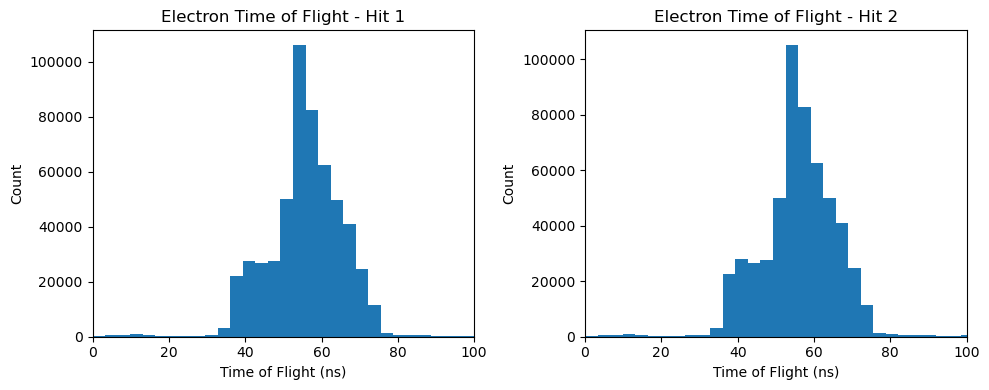

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

#########################
### peak of TOF hit 1 ###
#########################

ax1.hist(e_TOF0, bins=100)

# Set x-axis and y-axis limits
ax1.set_xlim(0, 100)
ax1.set_ylim(0, None)  # Adjust the y-axis limit as needed

# Add title and labels
ax1.set_title('Electron Time of Flight - Hit 1')
ax1.set_xlabel('Time of Flight (ns)')
ax1.set_ylabel('Count')

#########################
### peak of TOF hit 2 ###
#########################

ax2.hist(e_TOF1, bins=100)

# Set x-axis and y-axis limits
ax2.set_xlim(0, 100)
ax2.set_ylim(0, None)  # Adjust the y-axis limit as needed

# Add title and labels
ax2.set_title('Electron Time of Flight - Hit 2')
ax2.set_xlabel('Time of Flight (ns)')
ax2.set_ylabel('Count')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


0.2884902659699833
-0.12935059120563608


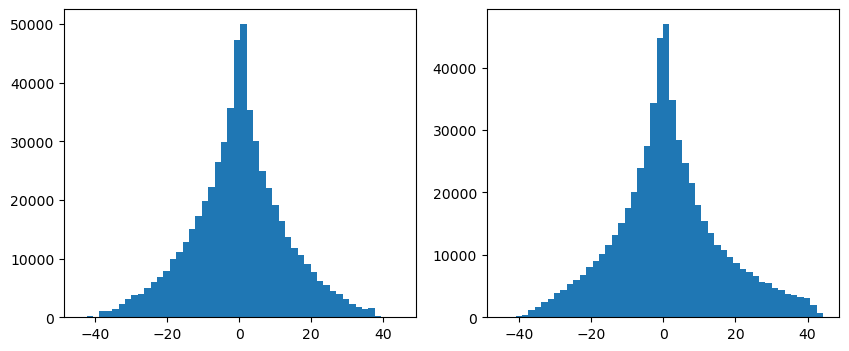

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

#########################
### peak of TOF hit 1 ###
#########################

a = ax1.hist(e_x0,bins=50)
b = list(zip(*a[0:2]))
e_TOF_max0 = max(b)[1]
print(e_TOF_max0)

#########################
### peak of TOF hit 2 ###
#########################

a = ax2.hist(e_y0,bins=50)
b = list(zip(*a[0:2]))
e_TOF_max1 = max(b)[1]
print(e_TOF_max1)

####################################
#USE THE MAX TO CELL ABOVE FOR SHIFT
####################################


### Ion Graphs

5251.474880730749
7479.636558898966


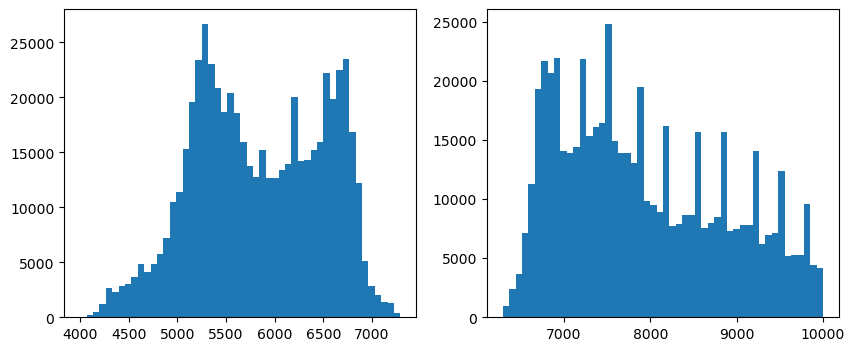

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

########################
### peak of ion1 TOF ###
########################
a = ax1.hist(i_TOF0[(i_TOF0>0) & (i_TOF0<10000)],bins=50)
b = list(zip(*a[0:2]))
i_TOF_max0 = max(b)[1]
print(i_TOF_max0)

########################
### peak of ion2 TOF ###
########################
a = ax2.hist(i_TOF1[(i_TOF1>0) & (i_TOF1<10000)],bins=50)
b = list(zip(*a[0:2]))
i_TOF_max1 = max(b)[1]
print(i_TOF_max1)

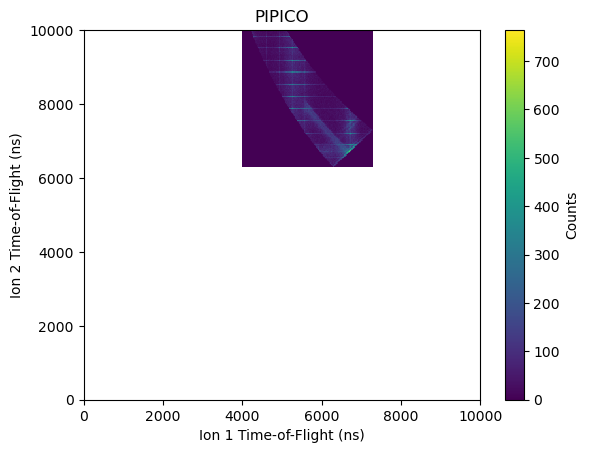

In [14]:
# Enable interactive plots
#%matplotlib notebook

# Assuming i_TOF0 and i_TOF1 are your data arrays
plt.hist2d(i_TOF0, i_TOF1, bins=(200, 200))

# Add title and labels
plt.title('PIPICO')
plt.xlabel('Ion 1 Time-of-Flight (ns)')
plt.ylabel('Ion 2 Time-of-Flight (ns)')

plt.xlim(0, 10000)
plt.ylim(0, 10000)

# Show colorbar
plt.colorbar(label='Counts')

#3213  6421
#2800 5620
#4640 4840
#3472  6047
#%matplotlib inline

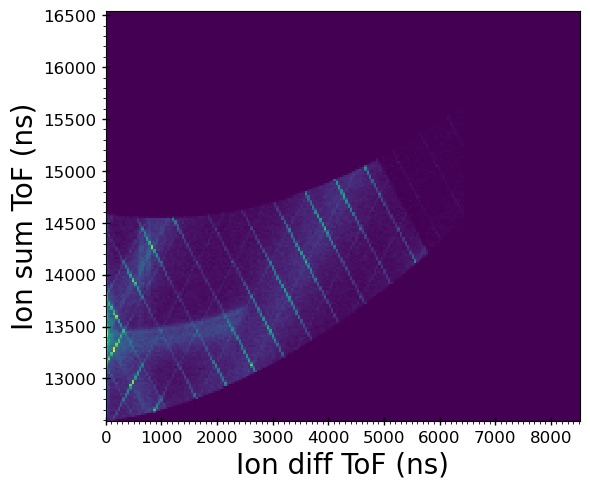

In [15]:
fig, ax = plt.subplots(1,1,figsize=(6,5))

plt.hist2d(i_TOF1-i_TOF0, i_TOF1+i_TOF0, bins = (200,200));#, cmap='hsv');
ax.set_xlabel('Ion diff ToF (ns)',fontsize=20,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Ion sum ToF (ns)',fontsize=20,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the font size of major tick labels
ax.tick_params(axis='both', which='minor', labelsize=10)  # Adjust the font size of minor tick labels
ax.tick_params(direction='inout', length=6, width=1, colors='black', grid_color='r', grid_alpha=0.5)

fig.tight_layout()
#fig.show()

3292.300493153724


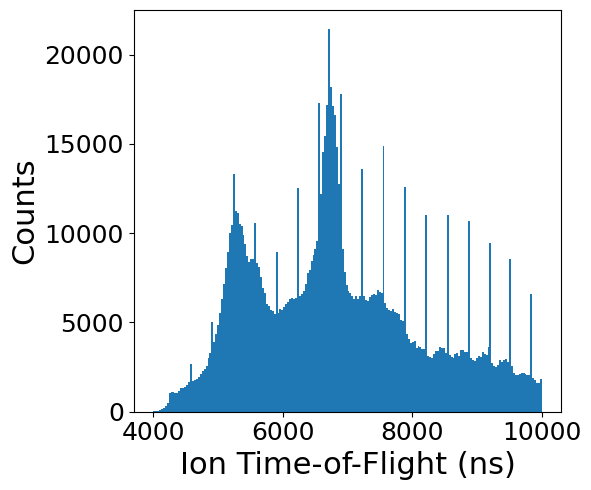

In [16]:
##################################
### make histogram of ion TOFs ###
##################################
fig, ax = plt.subplots(1,1,figsize=(6,5))

ax.hist(totaltof[(totaltof>0)&(totaltof<10000)],bins=200,histtype='stepfilled')
ax.set_xlabel('Ion Time-of-Flight (ns)',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.set_ylabel('Counts',fontsize=22,fontdict = {'family' : 'sans-serif', 'weight' : 'normal'})
ax.tick_params(labelsize=18)
fig.tight_layout()
#plt.yscale("log")
print(np.amax(i_TOF0)-np.amin(i_TOF0)) #difference in max and min TOF

-1.1457005270870368
0.12734611819408315


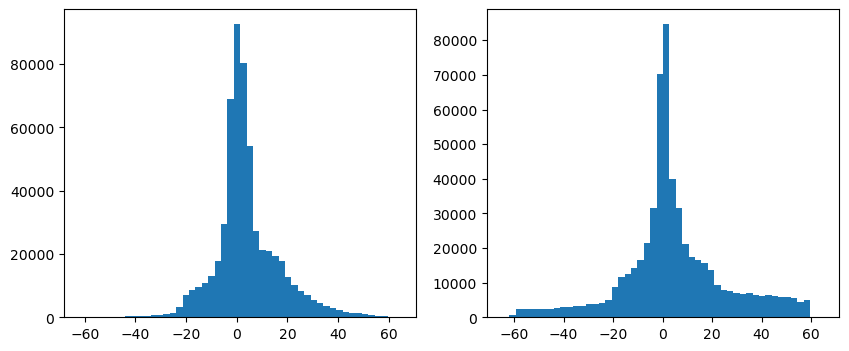

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

#########################
### peak of TOF hit 1 ###
#########################

a = ax1.hist(i_x1,bins=50)
b = list(zip(*a[0:2]))
e_TOF_max0 = max(b)[1]
print(e_TOF_max0)

#########################
### peak of TOF hit 2 ###
#########################

a = ax2.hist(i_y1,bins=50)
b = list(zip(*a[0:2]))
e_TOF_max1 = max(b)[1]
print(e_TOF_max1)

####################################
#USE THE MAX TO CELL ABOVE FOR SHIFT
####################################


Text(0, 0.5, 'i_y1 (mm)')

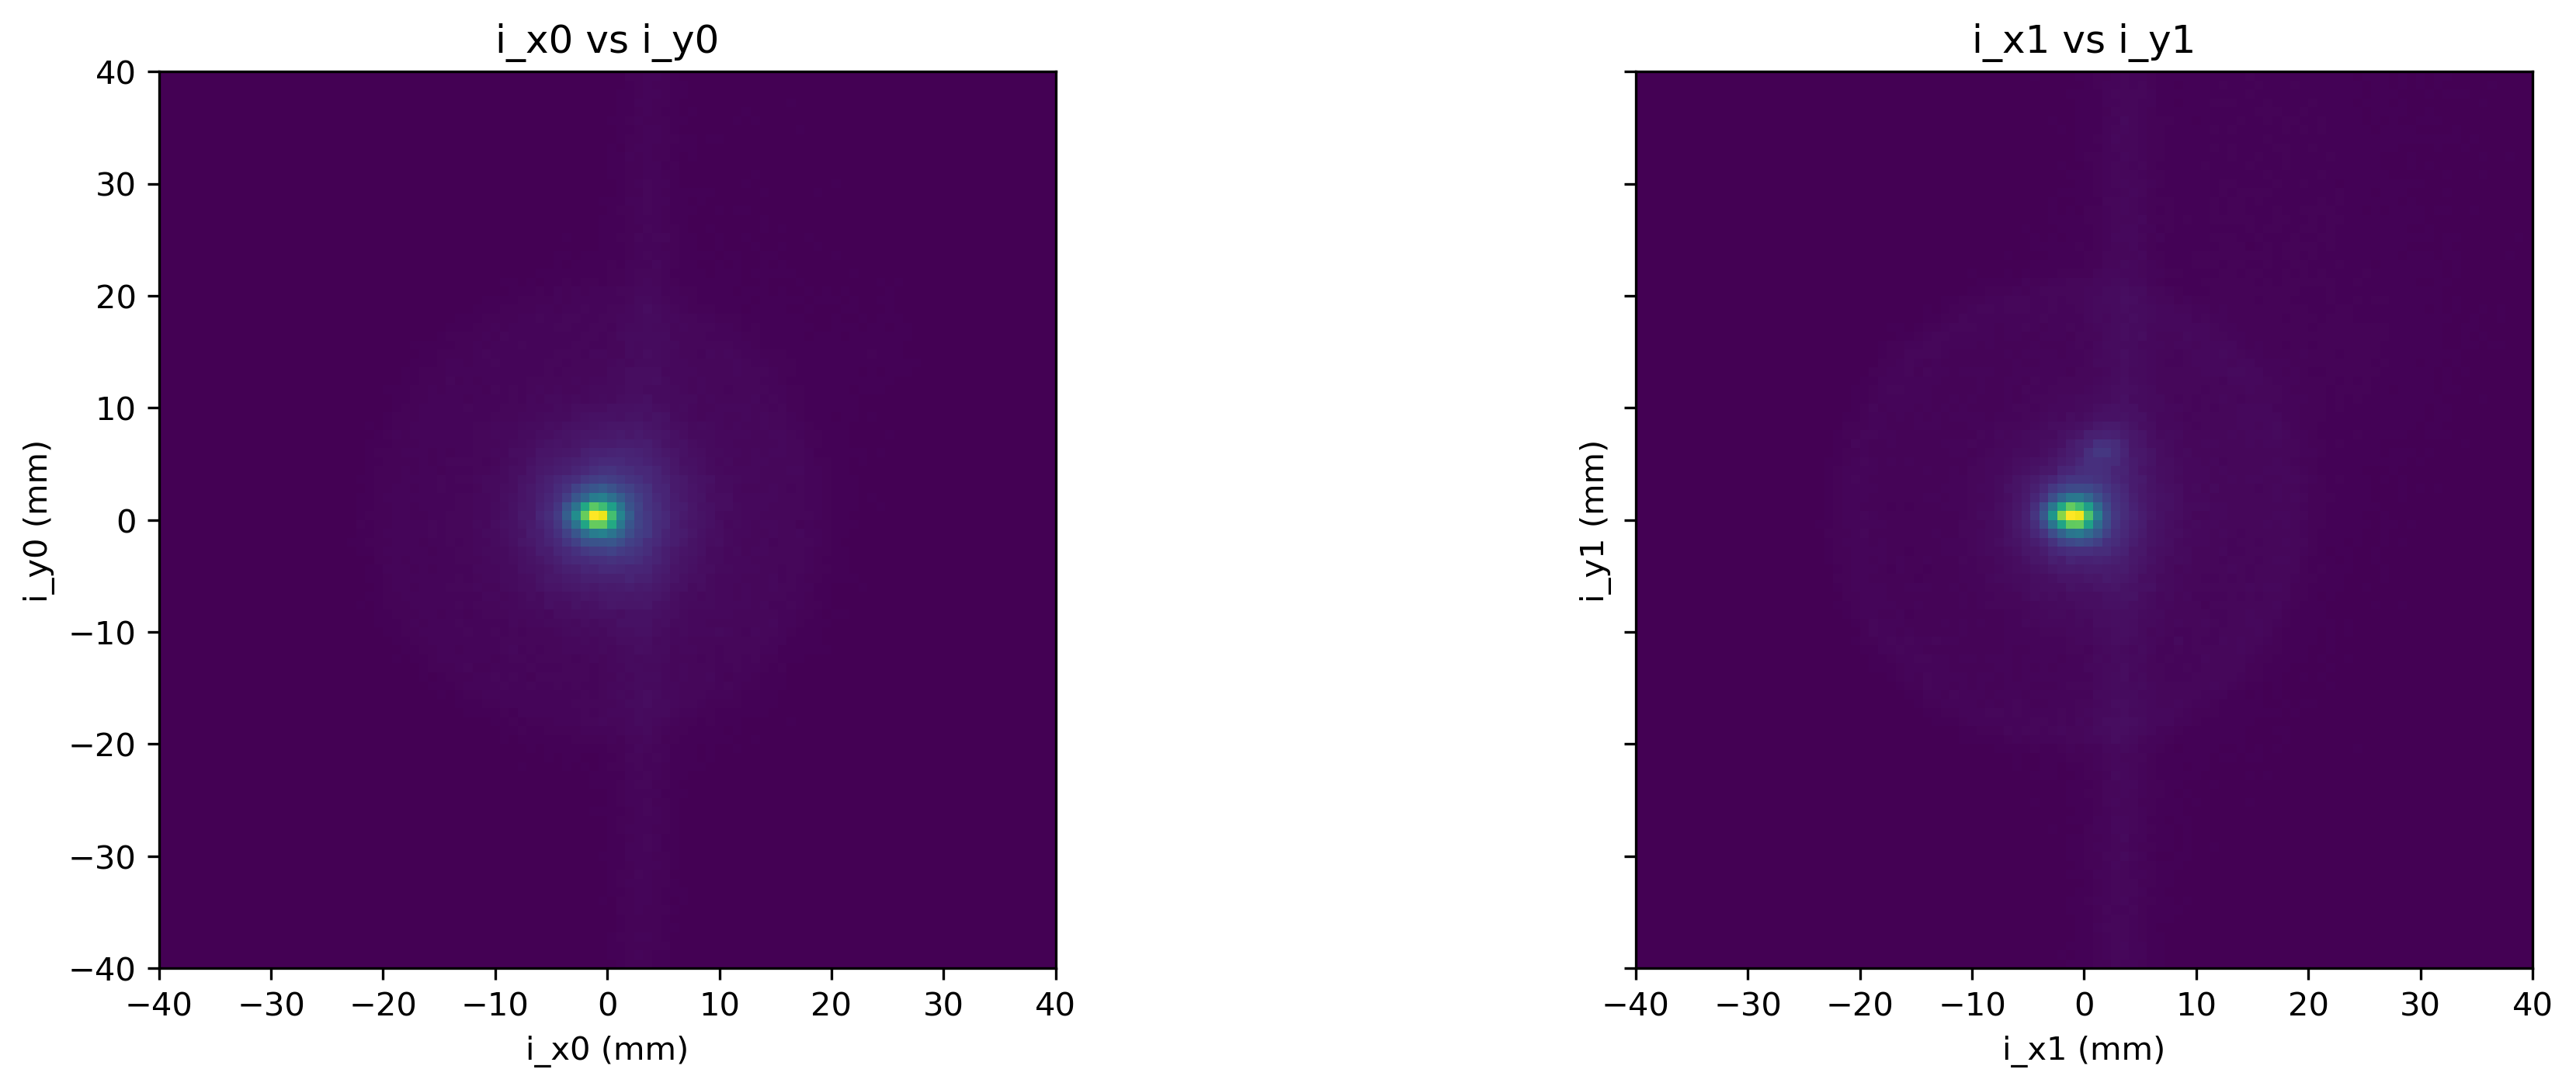

In [18]:
# Determine the data range
x_range = (-40, 40)
y_range = (-40, 40)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(r1x, r1y, bins=(100, 100), range=[x_range, y_range])
axs[0].set_aspect('equal')
axs[0].set_title('i_x0 vs i_y0')
axs[0].set_xlabel('i_x0 (mm)')
axs[0].set_ylabel('i_y0 (mm)')


hist2 = axs[1].hist2d(r2x, r2y, bins=(100, 100), range=[x_range, y_range])
axs[1].set_aspect('equal')
axs[1].set_title('i_x1 vs i_y1')
axs[1].set_xlabel('i_x1 (mm)')
axs[1].set_ylabel('i_y1 (mm)')

### Electron Graphs

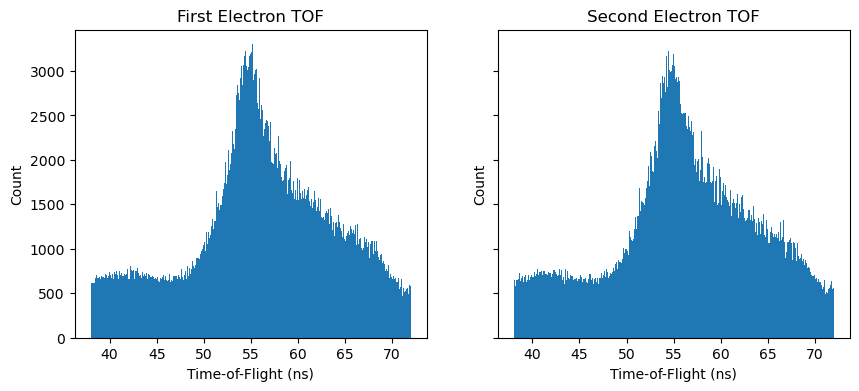

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4), sharey = True)

########################
### peak of ion1 TOF ###
########################
ax1.hist(e1tof[(r1tof>0) & (r1tof<10000) &(e1tof>38) & (e1tof<72)],bins=400);
ax1.set_title('First Electron TOF');
ax1.set_xlabel('Time-of-Flight (ns)');
ax1.set_ylabel('Count');


ax2.hist(e2tof[(r2tof>0) & (r2tof<10000) & (e2tof>38) & (e2tof<72)],bins=400);
ax2.set_title('Second Electron TOF');
ax2.set_xlabel('Time-of-Flight (ns)');
ax2.set_ylabel('Count');
#plt.yscale("log")
#fig.show()

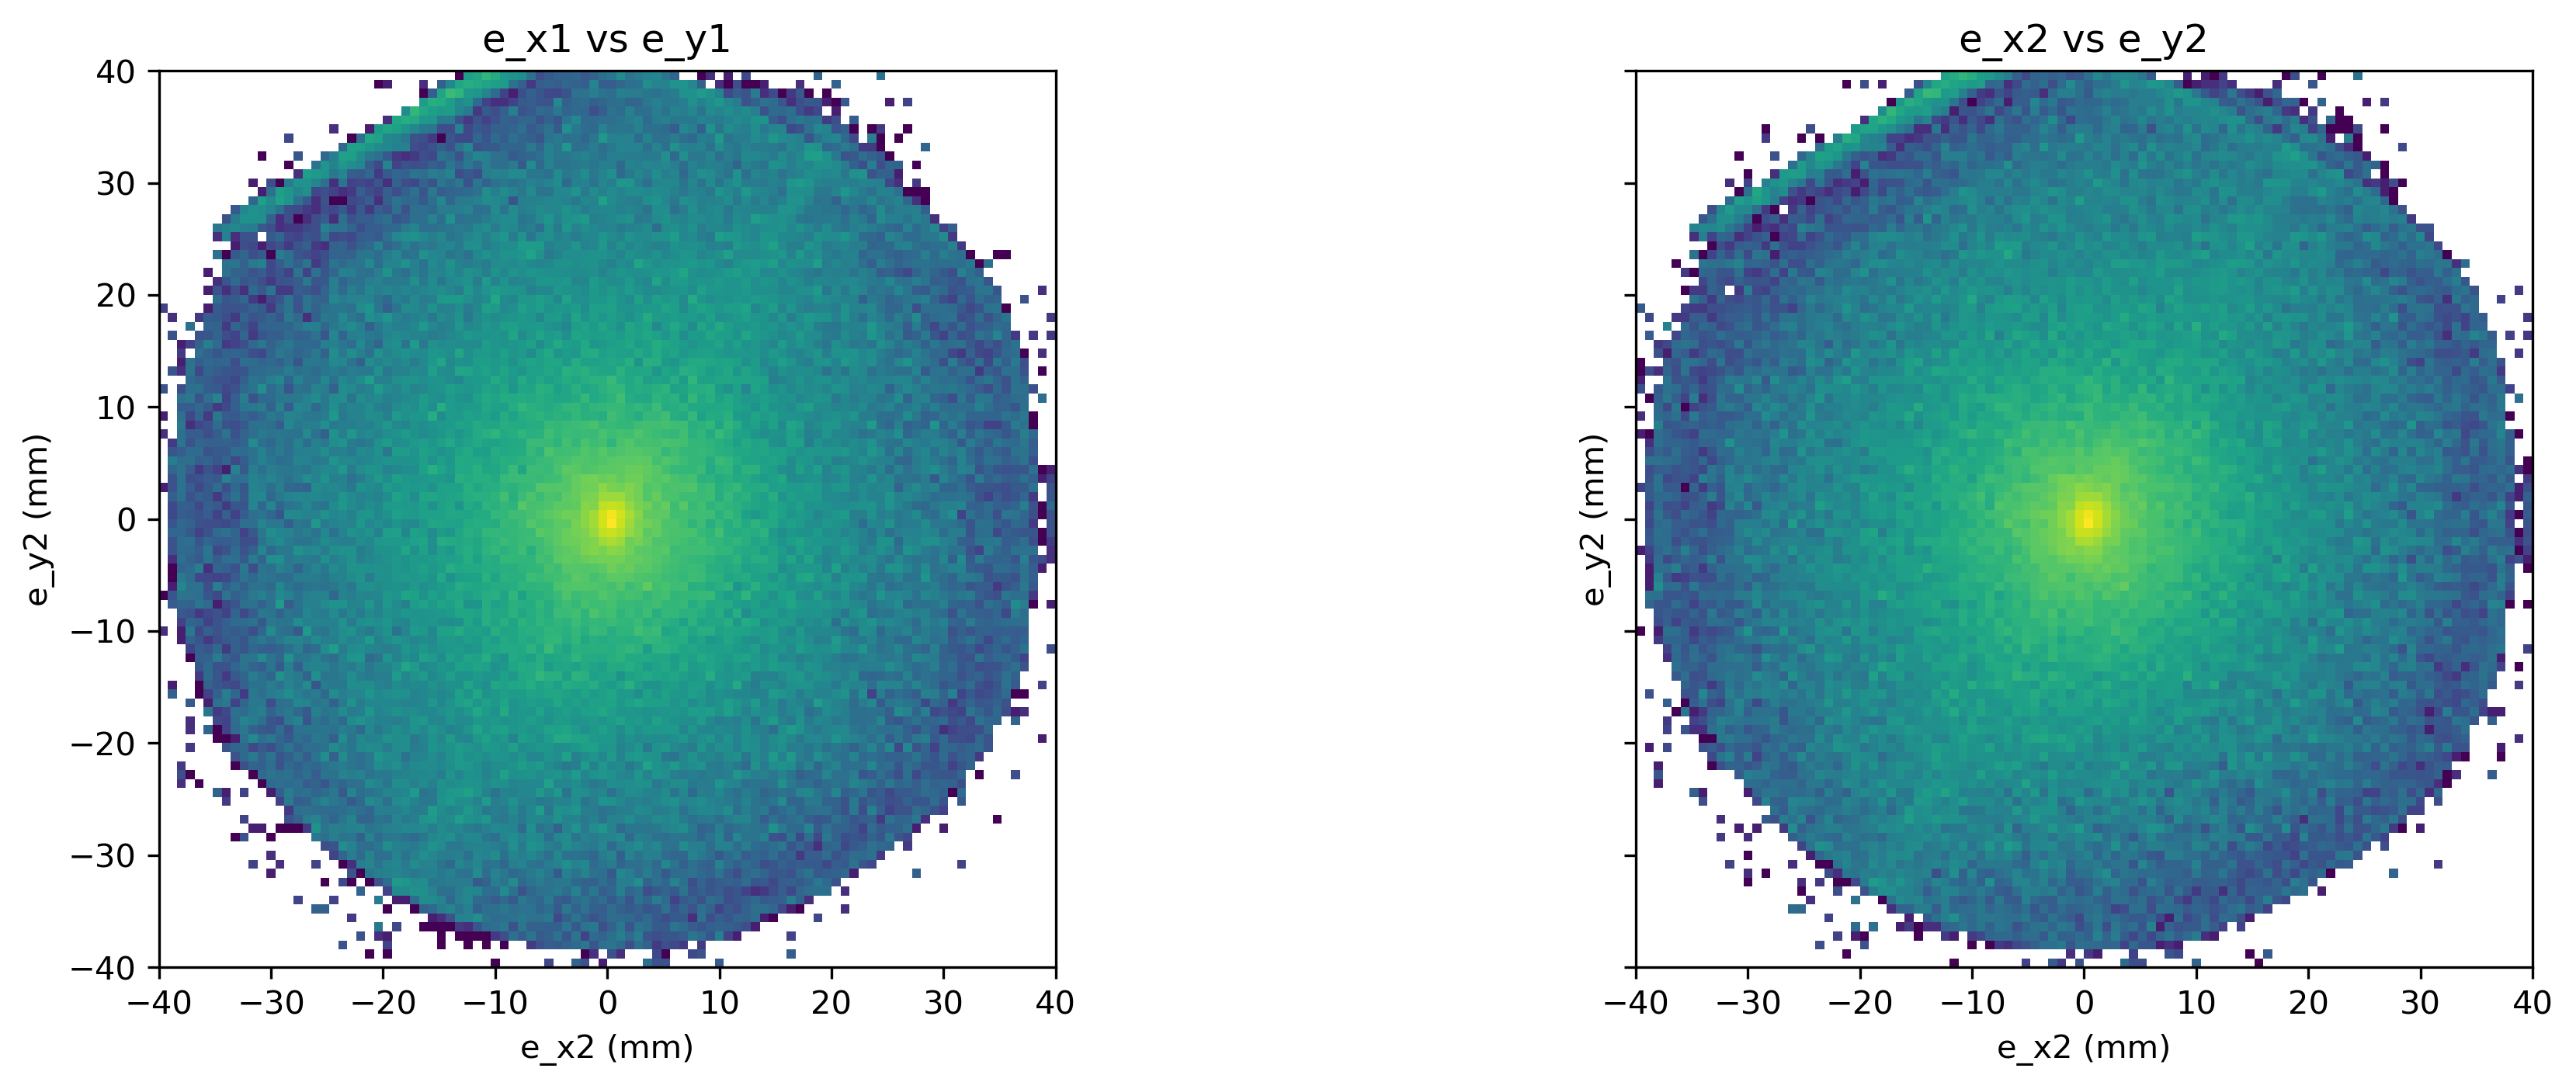

In [20]:
# Determine the data range
x_range = (-40, 40)
y_range = (-40, 40)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True,dpi=300)

# Plot the histograms
hist1 = axs[0].hist2d(e1x, e1y, bins=(100, 100), range=[x_range, y_range], norm=LogNorm());
axs[0].set_aspect('equal');
axs[0].set_title('e_x1 vs e_y1');
axs[0].set_xlabel('e_x2 (mm)');
axs[0].set_ylabel('e_y2 (mm)');


hist2 = axs[1].hist2d(e2x, e2y, bins=(100, 100), range=[x_range, y_range], norm=LogNorm());
axs[1].set_aspect('equal');
axs[1].set_title('e_x2 vs e_y2');
axs[1].set_xlabel('e_x2 (mm)');
axs[1].set_ylabel('e_y2 (mm)');

In [21]:
#3213  6421
#2800 5620
#4640 4840
#3472  6047


def polynomial_through_points(points, degree):
    """
    Calculate the coefficients of the polynomial that best fits the given points.
    
    Args:
    - points: A list of tuples (x, y) representing the coordinates of the points.
    - degree: The degree of the polynomial to fit.
    
    Returns:
    - A numpy array containing the coefficients of the polynomial.
    """
    x_values = [p[0] for p in points]
    y_values = [p[1] for p in points]
    
    coefficients = np.polyfit(x_values, y_values, degree)
    
    return coefficients

# Example usage:
# Define some points (x, y)
points = [ (2800, 5620), (3213, 6421), (3472, 6047), (4640, 4840)]

# Degree of the polynomial
degree = 50

# Get the polynomial coefficients
coefficients = polynomial_through_points(points, degree)
print("Polynomial coefficients:", coefficients)

Polynomial coefficients: [-0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  2.17779758e-151  1.00996478e-147  4.68295769e-144  2.17087797e-140
  1.00605085e-136  4.66049259e-133  2.15782254e-129  9.98386398e-126
  4.61513421e-122  2.13081448e-118  9.82232788e-115  4.51822318e-111
  2.07256576e-107  9.47192200e-104  4.30743141e-100  1.94585726e-096
  8.71136467e-093  3.85186222e-089  1.67371264e-085  7.09109523e-082
  2.89110150e-078  1.10675918e-074  3.76452979e-071  9.52443389e-068
 -1.39750384e-065 -2.65200306e-060 -2.67831253e-056 -2.03889254e-052
 -1.37414916e-048 -8.61029872e-045 -5.11354110e-041 -2.89841217e-037
 -1.56707409e-033 -8.02055740e-030 -3.81765200e-026 -1.62641119e-022
 -5.62718563e-019 -1.03280627e-015  5.15048555e-012  6.88821313e-008
  4.03619541e-004  1.19512290e+000 -1.73014374e+003]


C:\Users\Zhong\anaconda3\Lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Zhong\AppData\Local\Temp\ipykernel_13380\952375325.py:33: RankWarning: Polyfit may be poorly conditioned
  coefficients = polynomial_through_points(points, degree)


[3000.         3017.67676768 3035.35353535 3053.03030303 3070.70707071
 3088.38383838 3106.06060606 3123.73737374 3141.41414141 3159.09090909
 3176.76767677 3194.44444444 3212.12121212 3229.7979798  3247.47474747
 3265.15151515 3282.82828283 3300.50505051 3318.18181818 3335.85858586
 3353.53535354 3371.21212121 3388.88888889 3406.56565657 3424.24242424
 3441.91919192 3459.5959596  3477.27272727 3494.94949495 3512.62626263
 3530.3030303  3547.97979798 3565.65656566 3583.33333333 3601.01010101
 3618.68686869 3636.36363636 3654.04040404 3671.71717172 3689.39393939
 3707.07070707 3724.74747475 3742.42424242 3760.1010101  3777.77777778
 3795.45454545 3813.13131313 3830.80808081 3848.48484848 3866.16161616
 3883.83838384 3901.51515152 3919.19191919 3936.86868687 3954.54545455
 3972.22222222 3989.8989899  4007.57575758 4025.25252525 4042.92929293
 4060.60606061 4078.28282828 4095.95959596 4113.63636364 4131.31313131
 4148.98989899 4166.66666667 4184.34343434 4202.02020202 4219.6969697
 4237.3

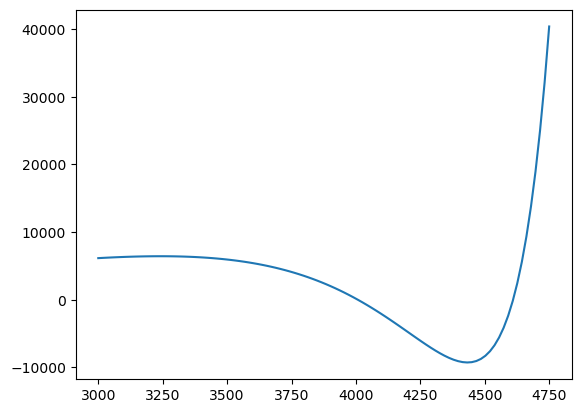

In [22]:

xrange = (3000, 4750, 100)  # Start, stop, num_points
x_values = np.linspace(xrange[0], xrange[1], xrange[2])
y_values = np.polyval(coefficients, x_values)
plt.plot(x_values, y_values, label='Polynomial')

print(x_values)
print(y_values)